In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
# 데이터 불러오기
genres = pd.read_csv('data/genres.csv')
countries = pd.read_csv('data/countries.csv')
rates = pd.read_csv('data/rates.csv')


In [34]:
rates.describe

<bound method NDFrame.describe of          user  movie  rate        time
0           0  10003     7  1494128040
1           0  10004     7  1467529800
2           0  10018     9  1513344120
3           0  10021     9  1424497980
4           0  10022     7  1427627340
...       ...    ...   ...         ...
140705  52023  10998    10  1421679660
140706  52024  10998    10  1204622460
140707  52025  10998     7  1498546920
140708  52026  10998     9  1434090420
140709  52027  10998    10  1227036960

[140710 rows x 4 columns]>

In [35]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140710 entries, 0 to 140709
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   user    140710 non-null  int64
 1   movie   140710 non-null  int64
 2   rate    140710 non-null  int64
 3   time    140710 non-null  int64
dtypes: int64(4)
memory usage: 4.3 MB


In [36]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   movie   2025 non-null   int64 
 1   genre   2025 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.8+ KB


In [37]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movie    1109 non-null   int64 
 1   country  1109 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.5+ KB


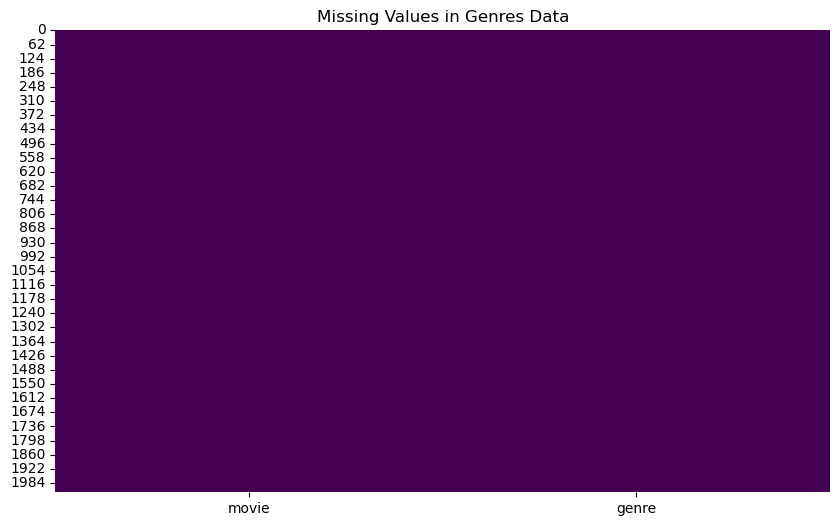

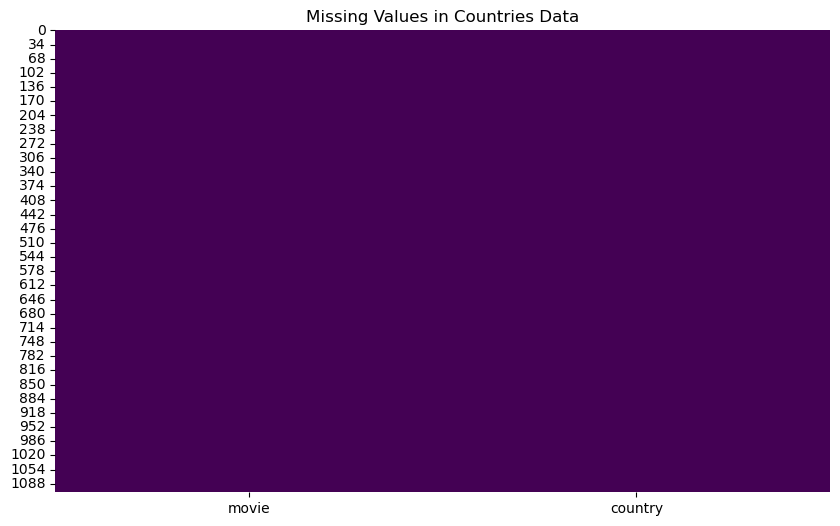

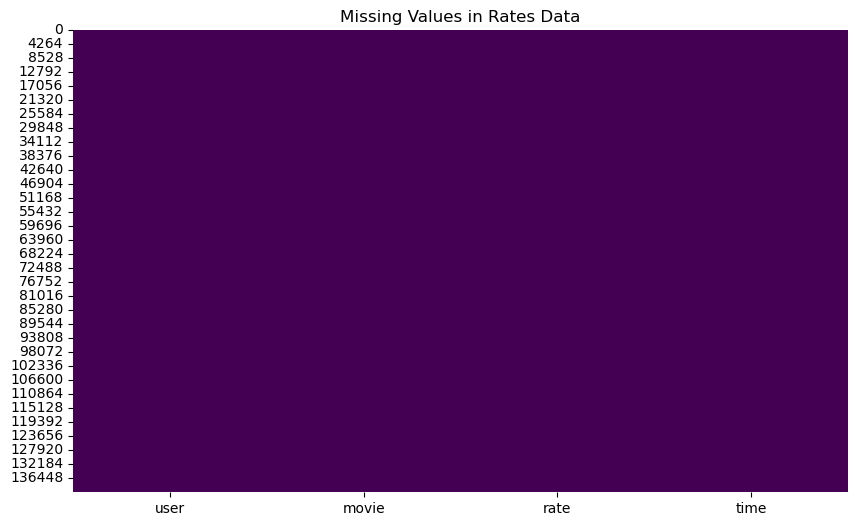

In [ ]:
# 결측치 확인 및 시각화
def plot_missing_values(df, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title(title)
    plt.show()

plot_missing_values(genres, 'Missing Values in Genres Data')
plot_missing_values(countries, 'Missing Values in Countries Data')
plot_missing_values(rates, 'Missing Values in Rates Data')


Outliers in 'rate':
          user  movie  rate        time
0           0  10003     7  1494128040
1           0  10004     7  1467529800
4           0  10022     7  1427627340
5           0  10023     7  1428738480
6           0  10024     4  1429359420
...       ...    ...   ...         ...
140667  51985  10983     1  1270835220
140672  51990  10985     2  1525411980
140676  51994  10988     5  1356811920
140701  52019  10998     3  1472397240
140707  52025  10998     7  1498546920

[20101 rows x 4 columns]


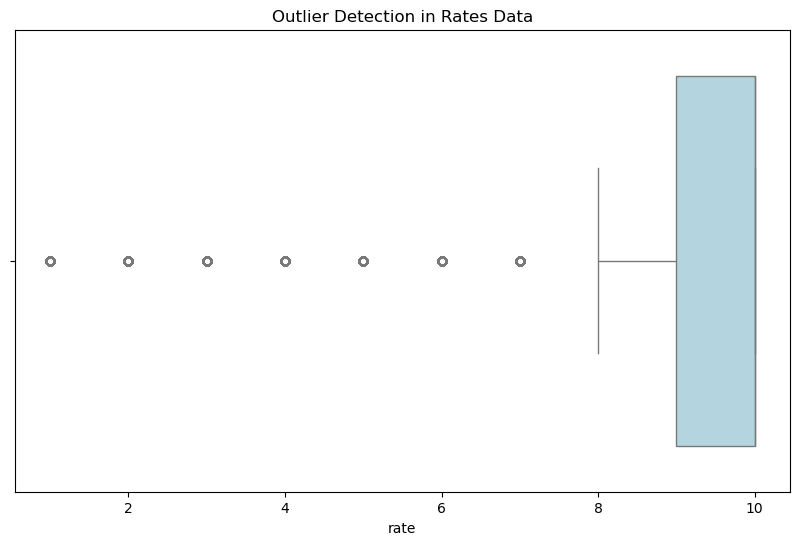

In [6]:
# 이상치 확인 (IQR 방법)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# 이상치 탐지 및 출력
for col in ['rate']:  # rates 데이터의 'rate' 열에서 이상치를 탐지
    outliers = detect_outliers(rates, col)
    print(f"Outliers in '{col}':\n", outliers)

# 이상치 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=rates, x='rate', color='lightblue')
plt.title('Outlier Detection in Rates Data')
plt.show()


# 사용자별/영화별 평점 분포를 히스토그램, 박스 플롯 등으로 시각화

In [7]:
# 사용자별 평균 평점 계산
user_avg_rate = rates.groupby('user')['rate'].mean()

# 영화별 평균 평점 계산
movie_avg_rate = rates.groupby('movie')['rate'].mean()


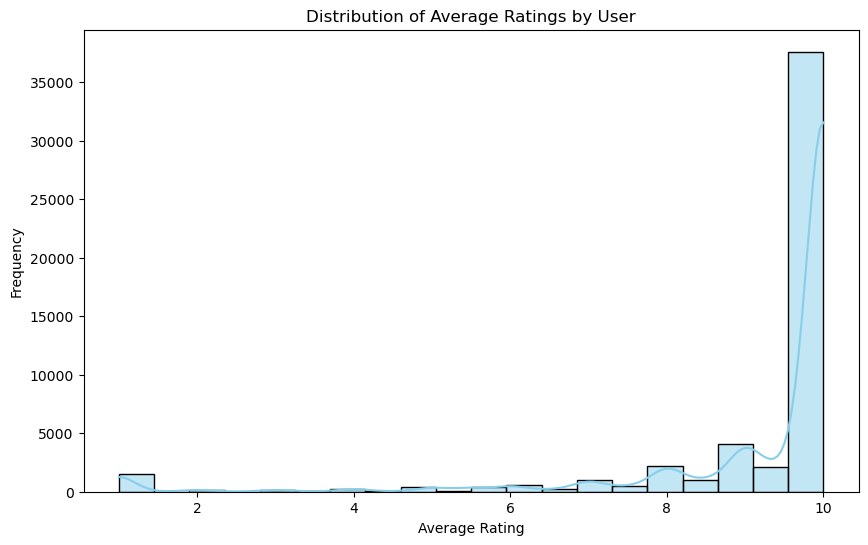

In [8]:

# 히스토그램 - 사용자별 평균 평점 분포
plt.figure(figsize=(10, 6))
sns.histplot(user_avg_rate, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Average Ratings by User')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


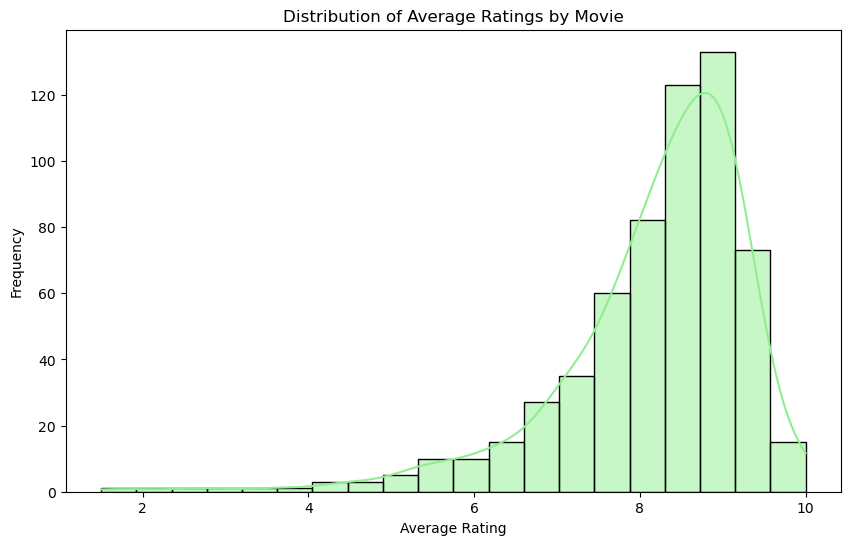

In [9]:

# 히스토그램 - 영화별 평균 평점 분포
plt.figure(figsize=(10, 6))
sns.histplot(movie_avg_rate, bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Average Ratings by Movie')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


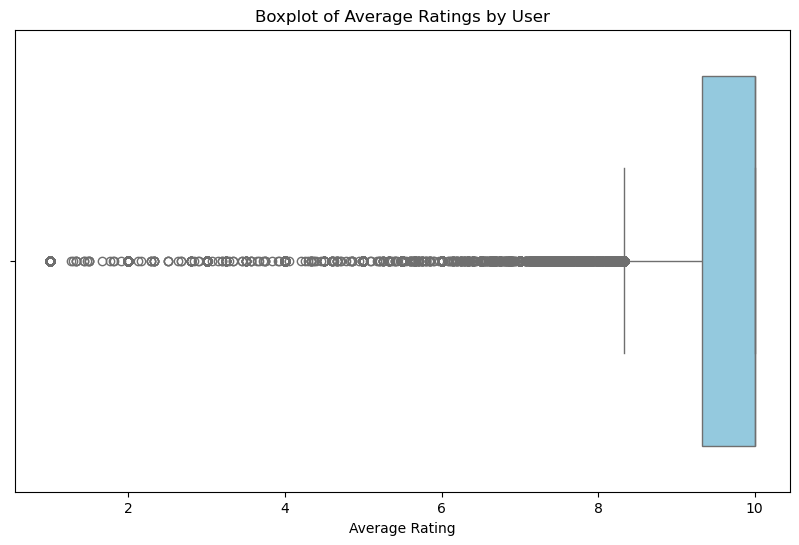

In [10]:

# 박스플롯 - 사용자별 평균 평점 분포
plt.figure(figsize=(10, 6))
sns.boxplot(x=user_avg_rate, color='skyblue')
plt.title('Boxplot of Average Ratings by User')
plt.xlabel('Average Rating')
plt.show()


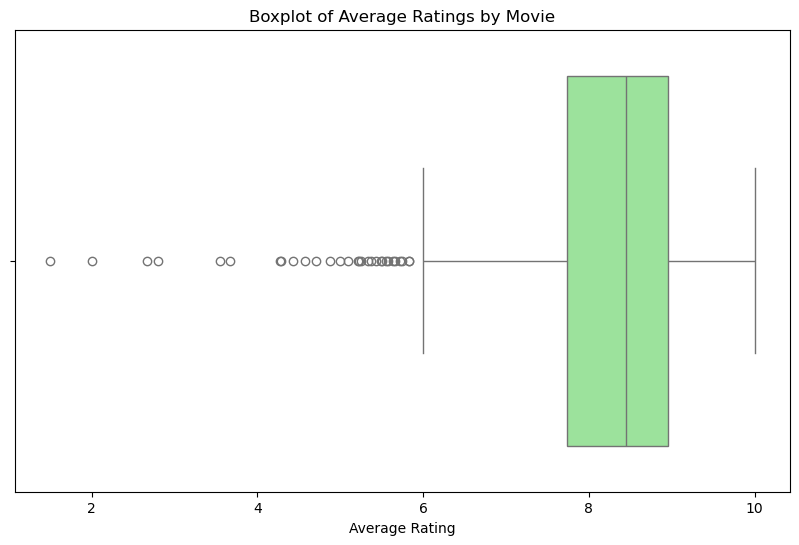

In [11]:

# 박스플롯 - 영화별 평균 평점 분포
plt.figure(figsize=(10, 6))
sns.boxplot(x=movie_avg_rate, color='lightgreen')
plt.title('Boxplot of Average Ratings by Movie')
plt.xlabel('Average Rating')
plt.show()

# 영화제목과 사용자 이름을 숫자에서 실제 값으로 연동해서 시각화

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'  # 또는 다른 한글 폰트
plt.rcParams['axes.unicode_minus'] = False    # 마이너스 기호 깨짐 방지

import seaborn as sns
# 스타일 설정
sns.set(font='NanumGothic', # 한글 폰트
        rc={'figure.figsize':(12,8)}, # 그래프 크기
        style='whitegrid'    # 그래프 스타일
)

# 데이터 로드
ratings = pd.read_csv('data/rates.csv')
movies = pd.read_csv('data/movies.txt', delimiter='\t')
peoples = pd.read_csv('data/peoples.txt', delimiter='\t')

# 영화 ID를 제목으로 매핑
ratings_with_titles = ratings.merge(movies[['movie', 'title']], 
                                  left_on='movie', 
                                  right_on='movie')



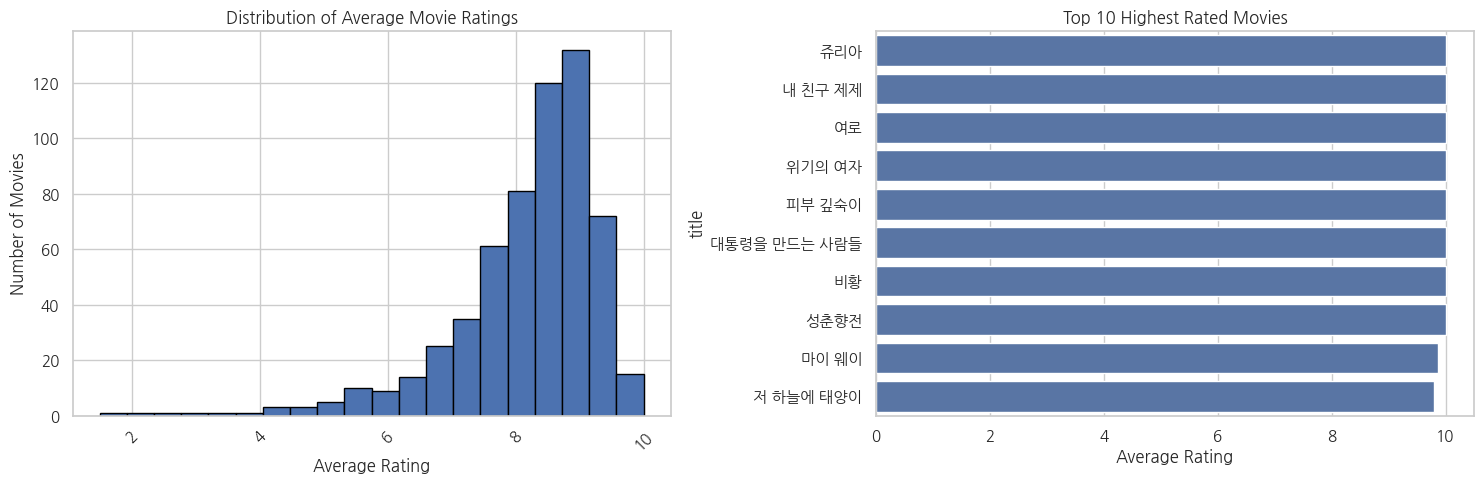

In [29]:
# 평점 분포 시각화
plt.figure(figsize=(15, 5))

# 영화별 평균 평점 히스토그램
plt.subplot(1, 2, 1)
movie_avg = ratings_with_titles.groupby('title')['rate'].mean()
plt.hist(movie_avg, bins=20, edgecolor='black')
plt.title('Distribution of Average Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

# 상위 평점 영화 시각화
plt.subplot(1, 2, 2)
top_movies = movie_avg.sort_values(ascending=False)[:10]
sns.barplot(x=top_movies.values, y=top_movies.index)
plt.title('Top 10 Highest Rated Movies')
plt.xlabel('Average Rating')

plt.tight_layout()
plt.show()




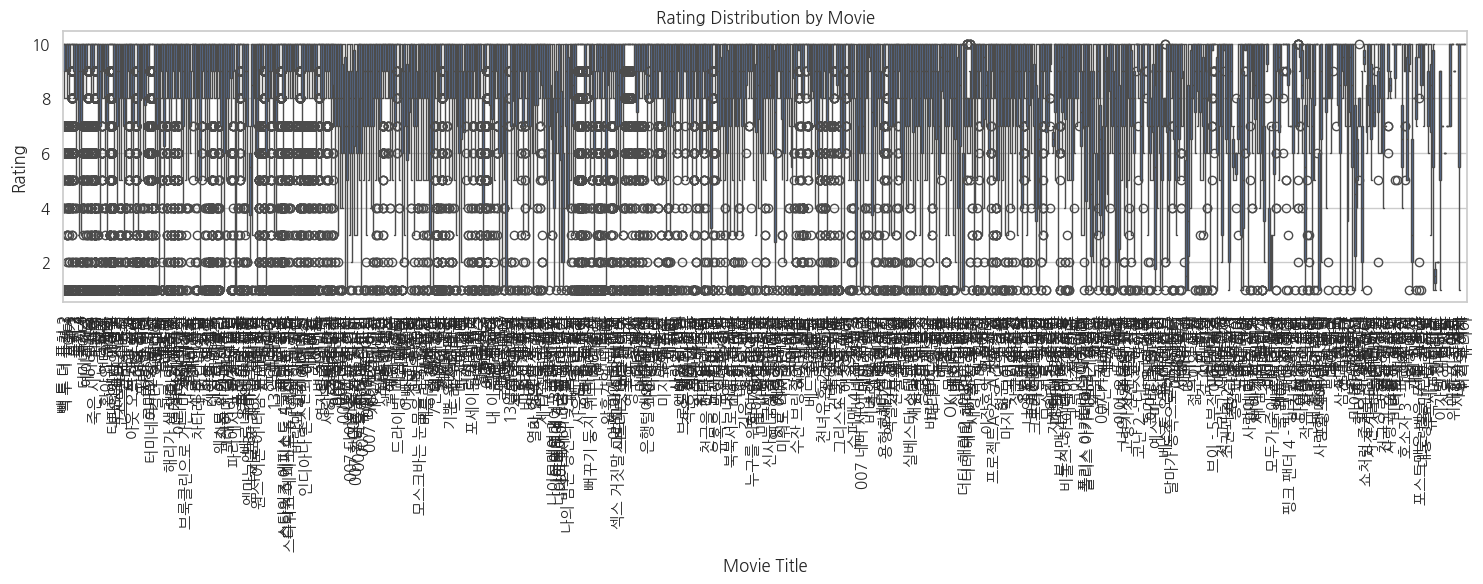

In [30]:
# 평점 분포 박스플롯
plt.figure(figsize=(15, 6))
sns.boxplot(data=ratings_with_titles, x='title', y='rate')
plt.xticks(rotation=90)
plt.title('Rating Distribution by Movie')
plt.xlabel('Movie Title')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

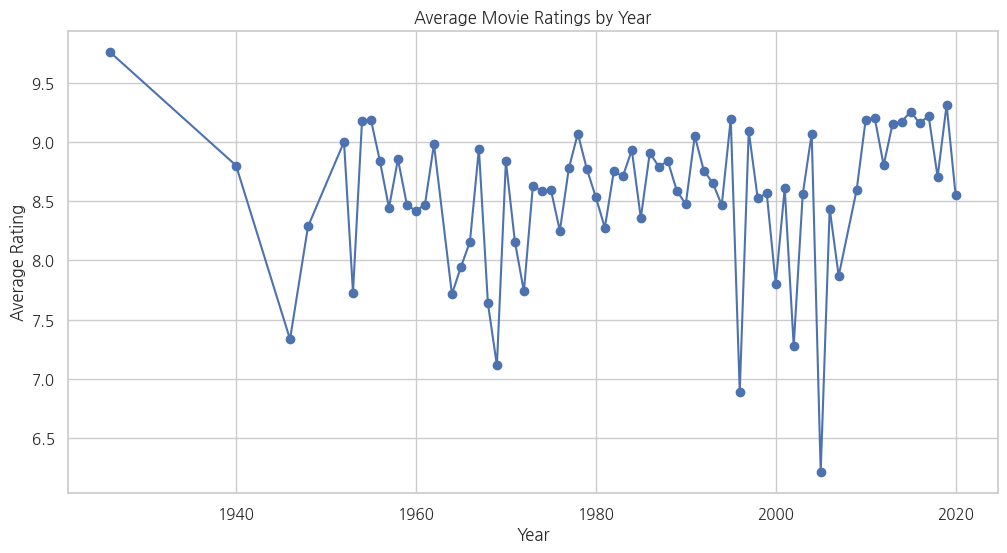

In [32]:
# 연도별 평균 평점 트렌드
plt.figure(figsize=(12, 6))
yearly_avg = ratings_with_titles.merge(movies[['movie', 'year']], 
                                     left_on='movie', 
                                     right_on='movie')
yearly_avg = yearly_avg.groupby('year')['rate'].mean()
plt.plot(yearly_avg.index, yearly_avg.values, marker='o')
plt.title('Average Movie Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()